# Projet Big Data : EDA

## 1. Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Chargement des données

In [4]:
df = pd.read_excel("../data/Allaitement_3mois.xlsx")

## 3. Quelle est la forme du DataFrame ? 

In [5]:
print("Forme du DataFrame :", df.shape)

Forme du DataFrame : (238045, 6)


## 4. Aperçu général des données

In [6]:
df.head()

,status_id,created_at,text,display_text_width,country,day
0,1538941385809747968,2022-06-20 17:46:33,Manic Mondays ☕\n\nFrom the 16th century onwar...,140,NaN,Monday
1,1538941854649032705,2022-06-20 17:48:24,southern softie commented on MailOnline: What ...,196,NaN,Monday
2,1538942219645861892,2022-06-20 17:49:51,MomToBe Women’s Rayon Maternity Dress/Easy Bre...,163,NaN,Monday
3,1538942452723335169,2022-06-20 17:50:47,@AlfredMwandagha Good for a breastfeeding bunn...,33,NaN,Monday
4,1538942645011030016,2022-06-20 17:51:33,We know more about cow’s milk than human milk....,140,NaN,Monday


 ## 5. Y a-t-il des valeurs manquantes ?

In [7]:
df.isnull().sum()

status_id                  0
created_at                 0
text                    9987
display_text_width         0
country               237560
day                        0
dtype: int64

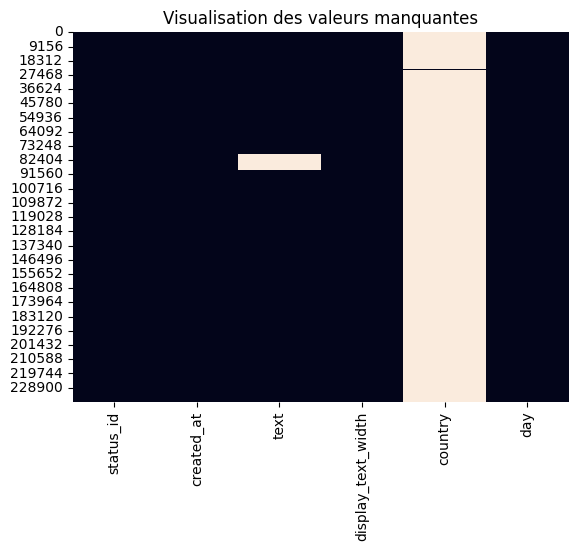

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Visualisation des valeurs manquantes")
plt.show()

## 6. Y a-t-il des valeurs dupliquées ?

In [9]:
nb_duplicated = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {nb_duplicated}")

Nombre de lignes dupliquées : 24142


## 7. Quelles sont les colonnes qui vont nous intéresser ?

In [10]:
df.columns
df.dtypes

status_id                      int64
created_at            datetime64[ns]
text                          object
display_text_width             int64
country                       object
day                           object
dtype: object

In [11]:
# On retire les lignes sans texte
df = df.dropna(subset=['text'])

# Colonnes retenues
df = df[['status_id', 'created_at', 'text', 'display_text_width']]

## 8. Y a-t-il des données aberrantes ou incohérences majeures ?

In [12]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
print(df['text_length'].describe())

df = df[df['text_length'] >= 15]

count    228058.000000
mean        161.272404
std          71.223563
min          13.000000
25%         133.000000
50%         140.000000
75%         199.000000
max         997.000000
Name: text_length, dtype: float64


In [13]:
# Vérification statistique
print(df['display_text_width'].describe())

# Cas suspects : texte court mais display_text_width élevé
df[(df['text_length'] < 30) & (df['display_text_width'] > 100)]

count    228039.000000
mean        145.020159
std          56.383974
min           0.000000
25%         132.000000
50%         140.000000
75%         143.000000
max         973.000000
Name: display_text_width, dtype: float64


,status_id,created_at,text,display_text_width,text_length


In [14]:
print("Dates manquantes :", df['created_at'].isna().sum())
print("Plage de dates :", df['created_at'].min(), "→", df['created_at'].max())

# Suppression si date future (optionnel)
df = df[df['created_at'] <= pd.Timestamp.now()]

Dates manquantes : 0
Plage de dates : 2022-06-20 17:46:33 → 2022-09-20 23:59:46


## 9. Premiers nettoyages

In [16]:
# Suppression des textes trop courts
df = df[df['text_length'] >= 15]

# Réinitialisation des index
df = df.reset_index(drop=True)

## 10. Sauvegarde du DataFrame nettoyé

In [17]:
df.to_csv("../data/cleaned_data.csv", index=False)

In [18]:
# Aperçu du DataFrame final
df.head()

,status_id,created_at,text,display_text_width,text_length
0,1538941385809747968,2022-06-20 17:46:33,Manic Mondays ☕\n\nFrom the 16th century onwar...,140,299
1,1538941854649032705,2022-06-20 17:48:24,southern softie commented on MailOnline: What ...,196,196
2,1538942219645861892,2022-06-20 17:49:51,MomToBe Women’s Rayon Maternity Dress/Easy Bre...,163,163
3,1538942452723335169,2022-06-20 17:50:47,@AlfredMwandagha Good for a breastfeeding bunn...,33,50
4,1538942645011030016,2022-06-20 17:51:33,We know more about cow’s milk than human milk....,140,197
